<a href="https://colab.research.google.com/github/chinu1997/Team5-Capstone/blob/main/Chinmaya_Devprasad_Team_5_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (75.3 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing trigg

In [3]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 4.4MB/s 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import folium
import matplotlib.patches as mpatches

### Getting Data Ready

In [6]:
working_dir='/content/drive/My Drive/Almabetter/Cohort Aravali/Module 2/Week 1/'
filename=working_dir+'globalterrorismdb_0718dist.csv'
terror_df=pd.read_csv(filename,engine='python')

In [7]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Check the shape

In [8]:
terror_df.shape

(181691, 135)

Check Columns

In [9]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Data Cleaning

In [10]:
# Dropping the unnecessary columns which contain max null values
for col in terror_df:
  if terror_df[col].isnull().sum()/len(terror_df)*100 >=60:
    terror_df.drop(col, axis=1,inplace=True)

In [11]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 60 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [12]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                          'attacktype1_txt':'AttackType','target1':'Target',
                          'nkill':'Killed','nwound':'Wounded','summary':'Summary',
                          'gname':'Group','targtype1_txt':'Target_type',
                          'weaptype1_txt':'Weapon_type'},inplace=True)

In [13]:
terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1


In [14]:
terror_df['casualities']=terror_df['Killed']+terror_df['Wounded']

Basic Question that come to our mind

In [15]:
print('Country with Highest Terrorist Attacks:',terror_df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror_df['Region'].value_counts().index[0])
print("Total number of attack happend around the world is",terror_df.success.sum())
print("Country that witnessed Most dangerous attack",terror_df.loc[terror_df['casualities'].idxmax(),'Country'])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Total number of attack happend around the world is 161632
Country that witnessed Most dangerous attack United States


## Global Terror Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


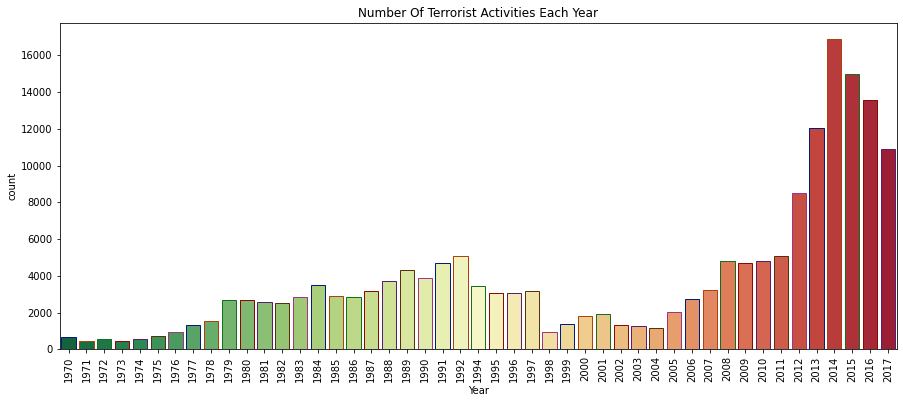

In [16]:

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Above fig we clearly see that the number of terrorist activities have gone up sharply after 2000.Clearly the number of terrorist activities have gone up sharply after 2000.

In [17]:
main=terror_df.success.value_counts()
main

1    161632
0     20059
Name: success, dtype: int64

Success rate of attack and failure on global

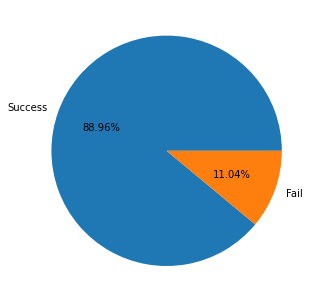

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(main, labels = ['Success','Fail'],autopct='%1.2f%%')
plt.show()

In [19]:
terror_df.AttackType.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

Most Attack type used by terrorist

Text(0, 0.5, 'No of Attack')

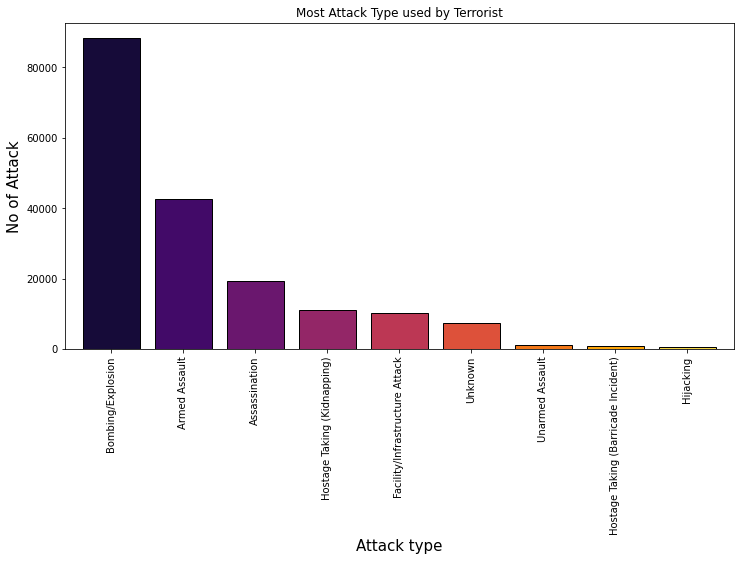

In [20]:
axplt=terror_df.AttackType.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    color=sns.color_palette('inferno',9)
    
)
axplt.set_title("Most Attack Type used by Terrorist")
axplt.set_xlabel('Attack type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)


Most favorite Target by Terrorist

Text(0, 0.5, 'No of Attack')

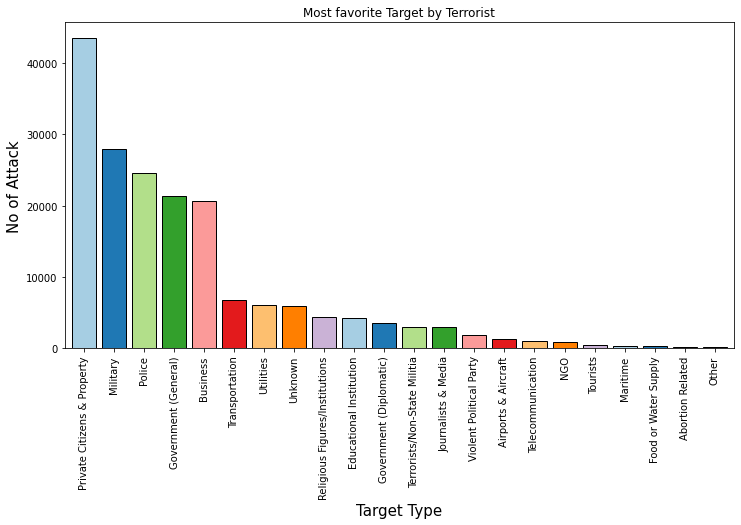

In [21]:
axplt=terror_df.Target_type.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    color=sns.color_palette('Paired',9)
)
axplt.set_title("Most favorite Target by Terrorist")
axplt.set_xlabel('Target Type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Terror Analysis By Country

Text(0, 0.5, 'No of Attack')

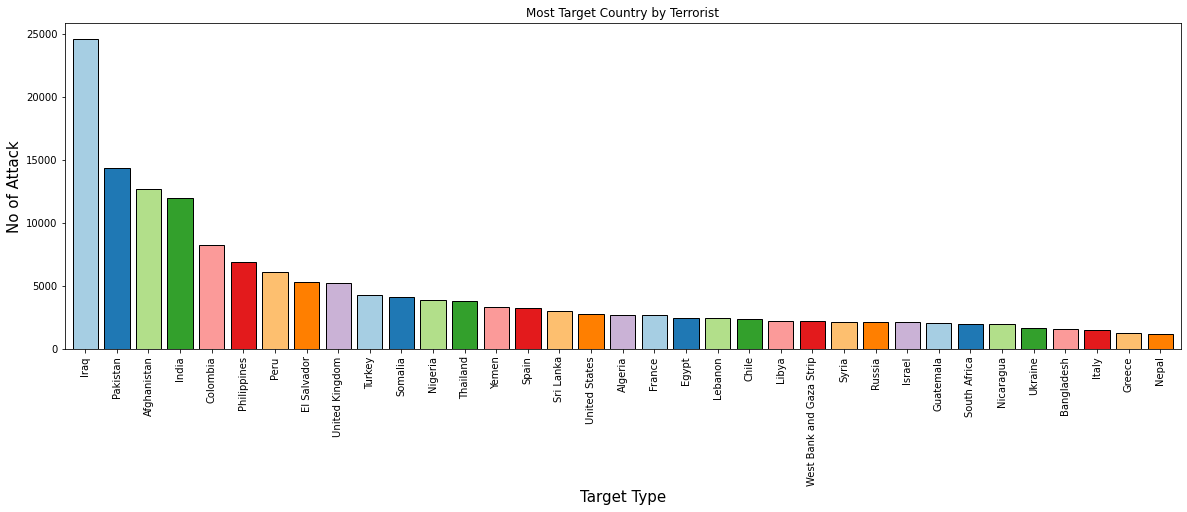

In [22]:
axplt=terror_df.Country.value_counts().iloc[0:35].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color=sns.color_palette('Paired',9)
)
axplt.set_title("Most Target Country by Terrorist")
axplt.set_xlabel('Target Type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

One thing to notice top4 countries are most populated country around the world so terrorist groups are targeting most populated Country around the world

Most Affected (Most Pepole died ) Country

Text(0, 0.5, 'No of Citizen Loss')

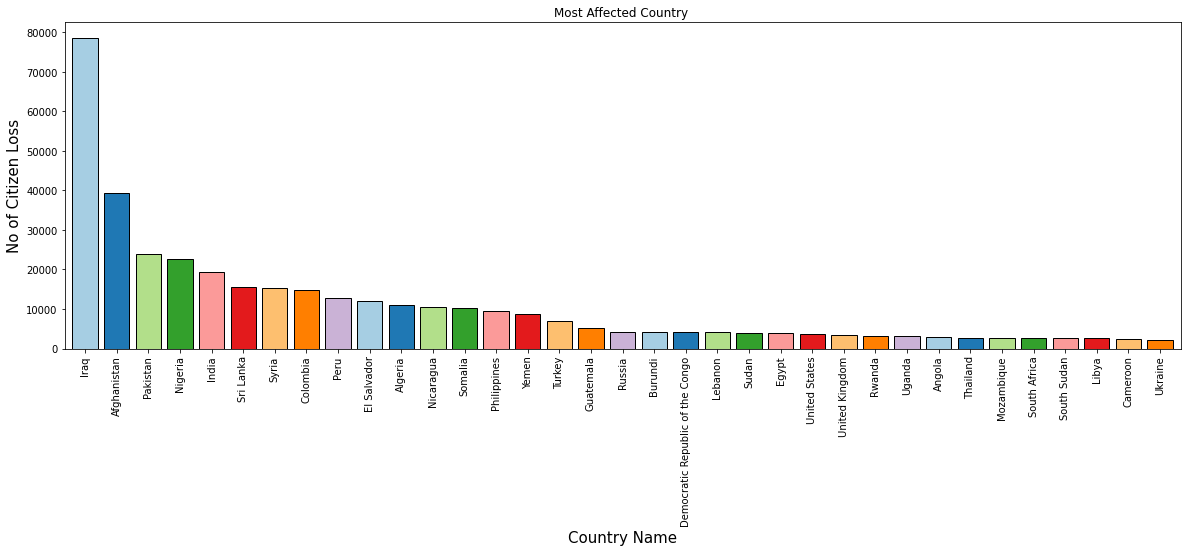

In [23]:
axplt=terror_df.groupby('Country')['Killed'].sum().sort_values(ascending=False).iloc[0:35].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
   color=sns.color_palette('Paired',9)
)
axplt.set_title("Most Affected Country ")
axplt.set_xlabel('Country Name', fontsize = 15)
axplt.set_ylabel('No of Citizen Loss', fontsize = 15)

Iraq has witnessed a very large number of terrorist activities then Pakistan. we know why terrorist groups are targeting countries with  largly populated countries, thus it willtake many lives.Another thing that come to my notice that India and afghanistan  are neghbour of china and also china is populated country but  their is no such activities their hmm.. something fishy????

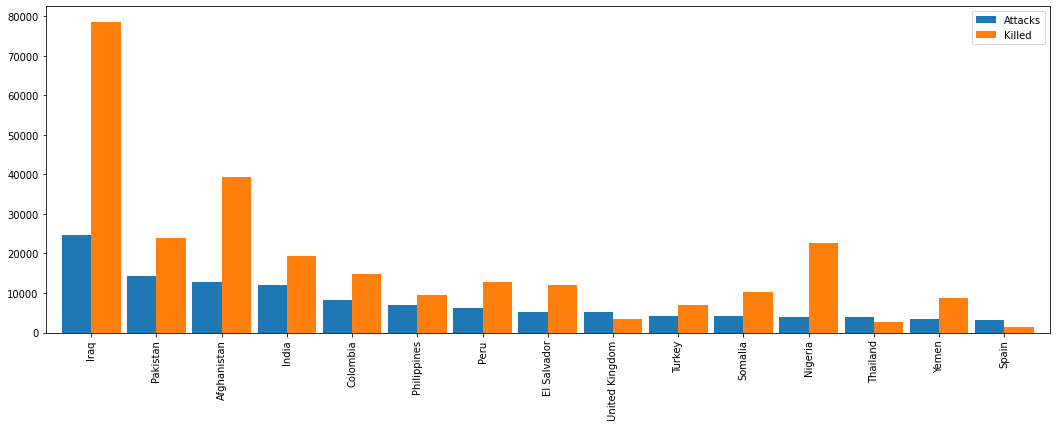

In [24]:
coun_terror=terror_df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror_df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Iraq is relatively the most dangerous country with the higher number of attacks and number of kills per citizen. On second and third place come Nicaragua and El Salvador.
When zooming into Europe, the most dangerous countries are United Kingdom, Croatia and Cyprus.

 Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq.

Text(0, 0.5, 'No of attack')

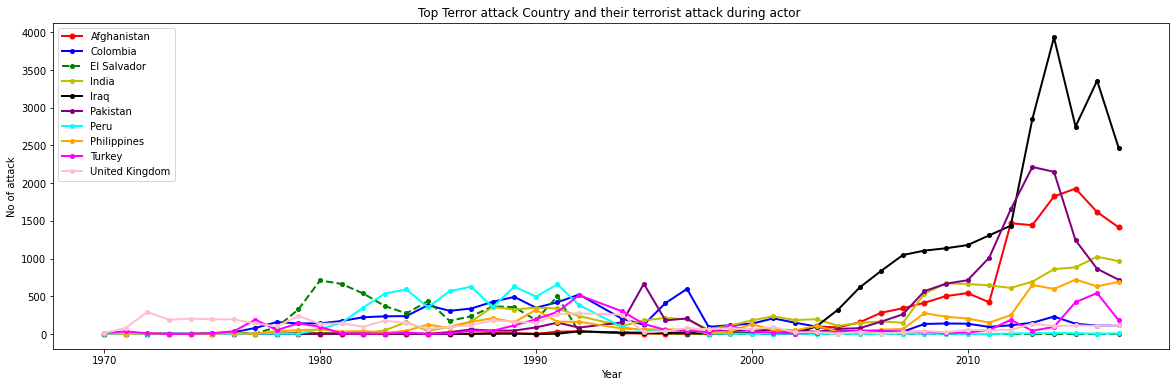

In [26]:
top_country10=terror_df[terror_df['Country'].isin(terror_df['Country'].value_counts().sort_values(ascending=False)[0:10].index)]
terror_activity_country=pd.crosstab(top_country10.Year,top_country10.Country).reset_index()
terror_activity_country=terror_activity_country.set_index('Year')

plt.plot(terror_activity_country['Afghanistan'],'ro-', linewidth=2, markersize=5)
plt.plot(terror_activity_country['Colombia'],'bo-', linewidth=2, markersize=4)
plt.plot(terror_activity_country['El Salvador'],'go--', linewidth=2, markersize=4)
plt.plot(terror_activity_country['India'],'yo-', linewidth=2, markersize=4)
plt.plot(terror_activity_country['Iraq'],color='black',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activity_country['Pakistan'],color='purple',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activity_country['Peru'],color='aqua',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activity_country['Philippines'],color='orange',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activity_country['Turkey'],color='magenta',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activity_country['United Kingdom'],color='pink',marker='o', linewidth=2, markersize=4)
plt.rcParams['figure.figsize'] = (20,6)

plt.legend(['Afghanistan', 'Colombia', 'El Salvador', 'India', 'Iraq', 'Pakistan','Peru', 'Philippines', 'Turkey', 'United Kingdom'])
plt.title("Top Terror attack Country and their terrorist attack during actor ")
plt.xlabel('Year')
plt.ylabel('No of attack')

Analysis By Region

Text(0, 0.5, 'No of Attack')

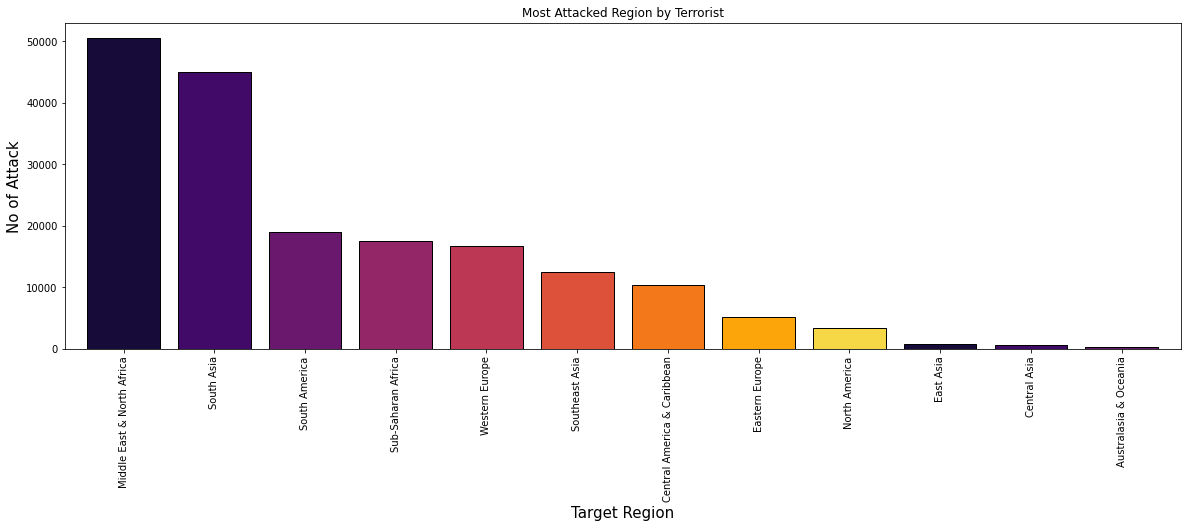

In [27]:
axplt=terror_df.Region.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color=sns.color_palette('inferno',9)
)
axplt.set_title("Most Attacked Region by Terrorist")
axplt.set_xlabel('Target Region', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks

 Type of attack Trend in region

Text(0, 0.5, 'no of attack')

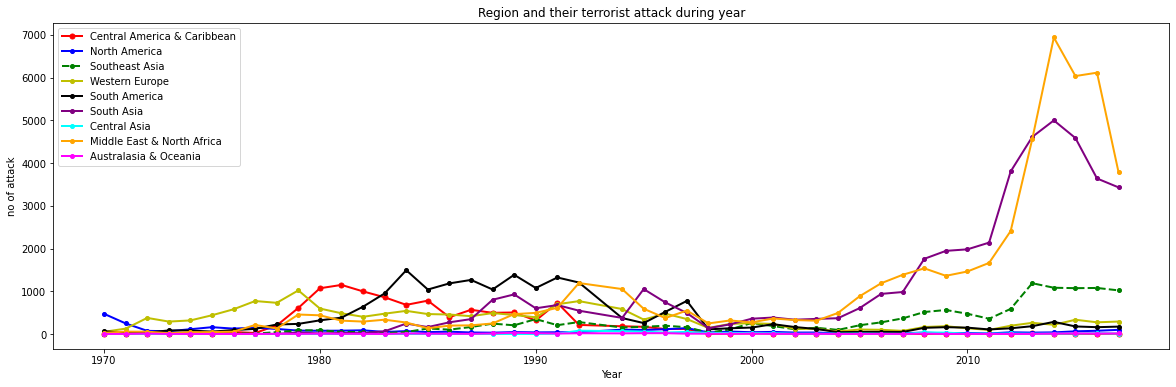

In [28]:
terror_region=pd.crosstab(terror_df.Year,terror_df.Region).reset_index()
terror_region=terror_region.set_index('Year')
plt.plot(terror_region['Central America & Caribbean'],'ro-', linewidth=2, markersize=5)
plt.plot(terror_region['North America'],'bo-', linewidth=2, markersize=4)
plt.plot(terror_region['Southeast Asia'],'go--', linewidth=2, markersize=4)
plt.plot(terror_region['Western Europe'],'yo-', linewidth=2, markersize=4)
plt.plot(terror_region['South America'],color='black',marker='o', linewidth=2, markersize=4)
plt.plot(terror_region['South Asia'],color='purple',marker='o', linewidth=2, markersize=4)
plt.plot(terror_region['Central Asia'],color='aqua',marker='o', linewidth=2, markersize=4)
plt.plot(terror_region['Middle East & North Africa'],color='orange',marker='o', linewidth=2, markersize=4)
plt.plot(terror_region['Australasia & Oceania'],color='magenta',marker='o', linewidth=2, markersize=4)

plt.legend(['Central America & Caribbean','North America','Southeast Asia','Western Europe','South America','South Asia','Central Asia','Middle East & North Africa','Australasia & Oceania'])

plt.title("Region and their terrorist attack during year")
plt.xlabel('Year')
plt.ylabel('no of attack')


This plot show us Type of attack Trend in region

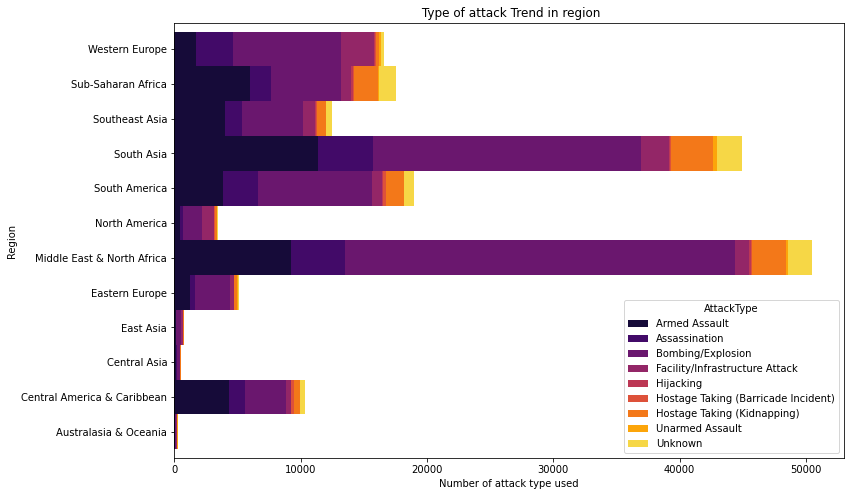

In [29]:
# This plot show us Type of attack Trend in region
pd.crosstab(terror_df.Region,terror_df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title(" Type of attack Trend in region")
plt.xlabel('Number of attack type used')
plt.ylabel('Region')
plt.show()

Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

 Terrorist Group Analysis

Text(0, 0.5, 'No of Attack')

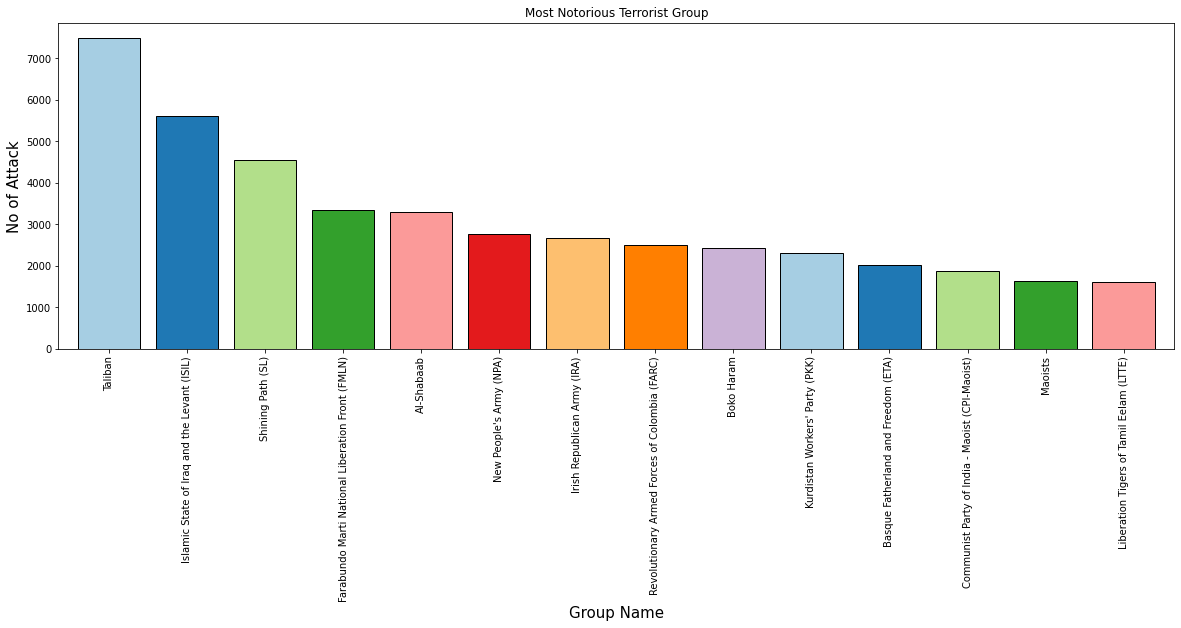

In [30]:
axplt=terror_df.Group.value_counts().iloc[1:15].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
   color=sns.color_palette('Paired',9)
)
axplt.set_title("Most Notorious Terrorist Group")
axplt.set_xlabel('Group Name', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

We can see that most active terror group is Taliban

Activities Terrorist Group During Year

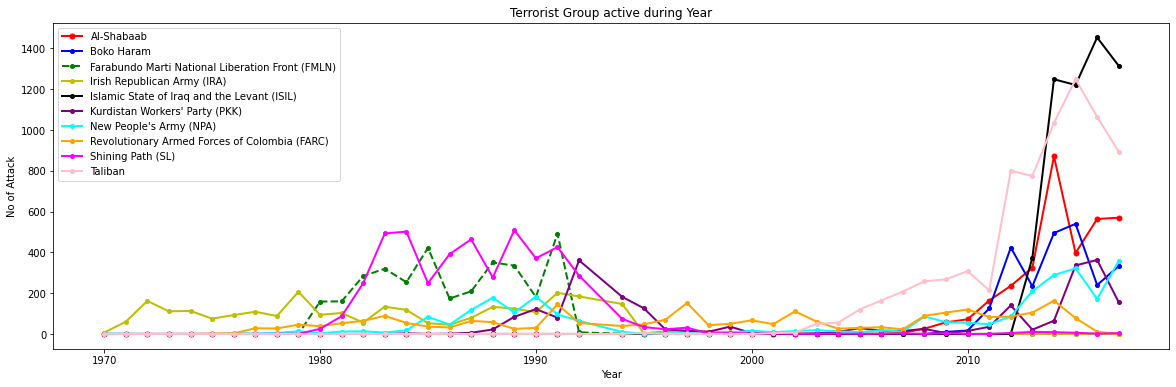

In [31]:
top_groups10=terror_df[terror_df['Group'].isin(terror_df['Group'].value_counts()[1:11].index)]
terror_activities=pd.crosstab(top_groups10.Year,top_groups10.Group).reset_index()

terror_activities=terror_activities.set_index('Year')

plt.plot(terror_activities['Al-Shabaab'],'ro-', linewidth=2, markersize=5)
plt.plot(terror_activities['Boko Haram'],'bo-', linewidth=2, markersize=4)
plt.plot(terror_activities['Farabundo Marti National Liberation Front (FMLN)'],'go--', linewidth=2, markersize=4)
plt.plot(terror_activities['Irish Republican Army (IRA)'],'yo-', linewidth=2, markersize=4)
plt.plot(terror_activities['Islamic State of Iraq and the Levant (ISIL)'],color='black',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activities["Kurdistan Workers' Party (PKK)"],color='purple',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activities["New People's Army (NPA)"],color='aqua',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activities['Revolutionary Armed Forces of Colombia (FARC)'],color='orange',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activities['Shining Path (SL)'],color='magenta',marker='o', linewidth=2, markersize=4)
plt.plot(terror_activities['Taliban'],color='pink',marker='o', linewidth=2, markersize=4)

plt.legend(['Al-Shabaab','Boko Haram','Farabundo Marti National Liberation Front (FMLN)','Irish Republican Army (IRA)','Islamic State of Iraq and the Levant (ISIL)',"Kurdistan Workers' Party (PKK)","New People's Army (NPA)",'Revolutionary Armed Forces of Colombia (FARC)',"Shining Path (SL)",'Taliban'])
plt.title("Terrorist Group active during Year")
plt.xlabel('Year')
plt.ylabel('No of Attack')
plt.show()

In [32]:
terror_df.head()


,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1,0.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1,NaN


Global terror Attack having Casualties Above 60

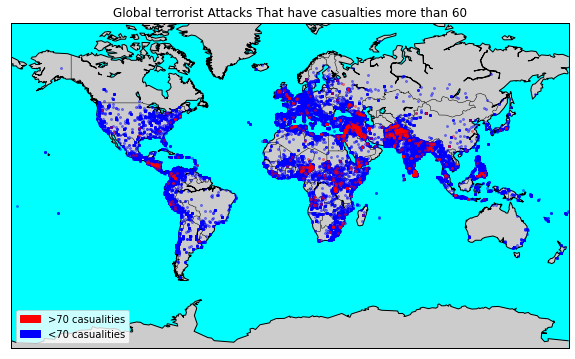

In [33]:
global_map = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

lat_=list(terror_df[terror_df['casualities']<70].latitude)
long_=list(terror_df[terror_df['casualities']<70].longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

lat_=list(terror_df[terror_df['casualities']>70].latitude)
long_=list(terror_df[terror_df['casualities']>70].longitude)
x_,y_=global_map(long_,lat_)
global_map.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)

global_map.drawcoastlines()
global_map.drawcountries()
global_map.fillcontinents(lake_color='cyan')
global_map.drawmapboundary(fill_color='cyan')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global terrorist Attacks That have casualties more than 60')

plt.legend(loc='lower left',handles=[mpatches.Patch(color='red',label='>70 casualities'),mpatches.Patch(color='blue',label='<70 casualities')])

plt.show()


The above basemap shows the places of attacks. The red circles are those that had more than 60 casualities(wounded+killed) and blue represent < 60 

## *Analysis* of india


In [34]:
india_terror_df=terror_df[terror_df['Country']== 'India']
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,NaN


P

In [35]:

india_terror_df['casualities'].fillna(india_terror_df['casualities'].median(),inplace=True)
india_terror_df['Killed'].fillna(india_terror_df['Killed'].median(),inplace=True)
india_terror_df['latitude'].fillna(india_terror_df['latitude'].median(),inplace=True)
india_terror_df['longitude'].fillna(india_terror_df['longitude'].median(),inplace=True)
india_terror_df['Wounded'].fillna(india_terror_df['Wounded'].median(),inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


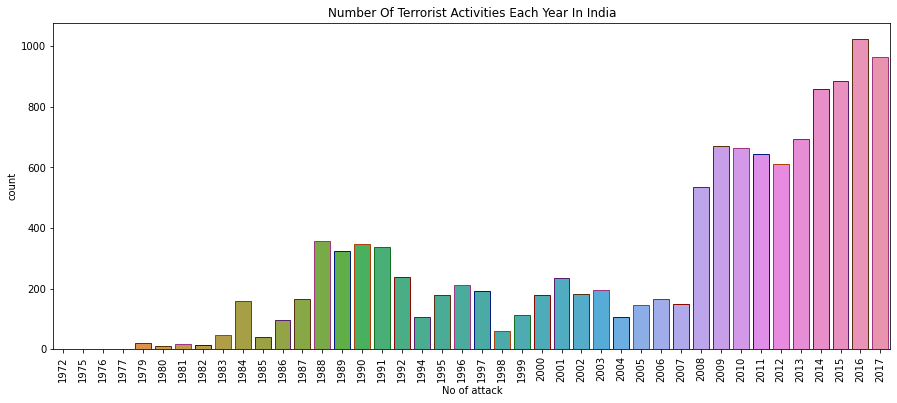

In [36]:
# Analysis of india


plt.subplots(figsize=(15,6))
sns.countplot('Year',data=india_terror_df,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year In India')
plt.xlabel('No of attack')
plt.show()

Damn ,those bars are not look good after 2007 

In [37]:
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0


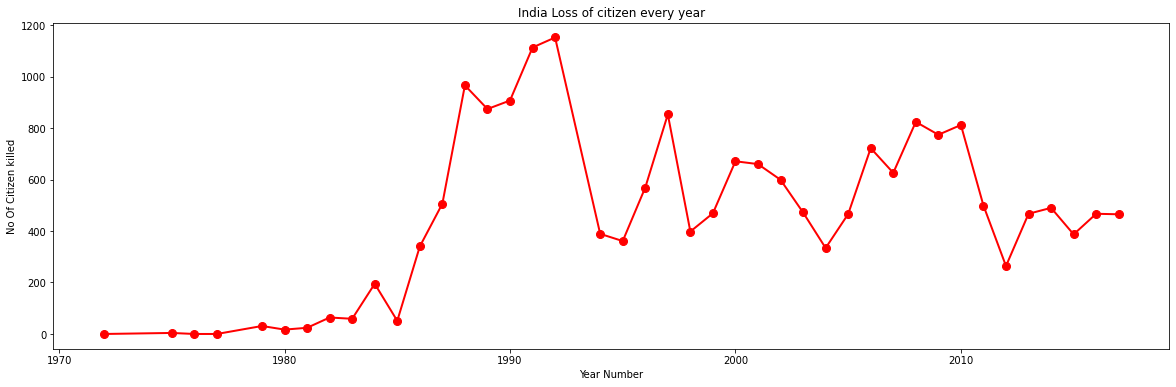

In [38]:
ind_kill_df=india_terror_df.groupby('Year').agg({'Killed':sum}).reset_index()
ind_kill_df

x_label=ind_kill_df['Year']                                                           
y_label=ind_kill_df['Killed']                                                                          

plt.plot(x_label,y_label,'ro-', linewidth=2, markersize=8)                                  
plt.title('India Loss of citizen every year',{'fontsize':12,'fontweight':30})
plt.ylabel('No Of Citizen killed',{'fontsize':10,'fontweight':15})
plt.xlabel('Year Number',{'fontsize':10,'fontweight':15})
plt.rcParams['figure.figsize'] = (20,8)


In [39]:
india_terror_df.loc[india_terror_df['provstate'] == 'Orissa', 'provstate'] ='Odisha'


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Text(0, 0.5, 'No Attack happened')

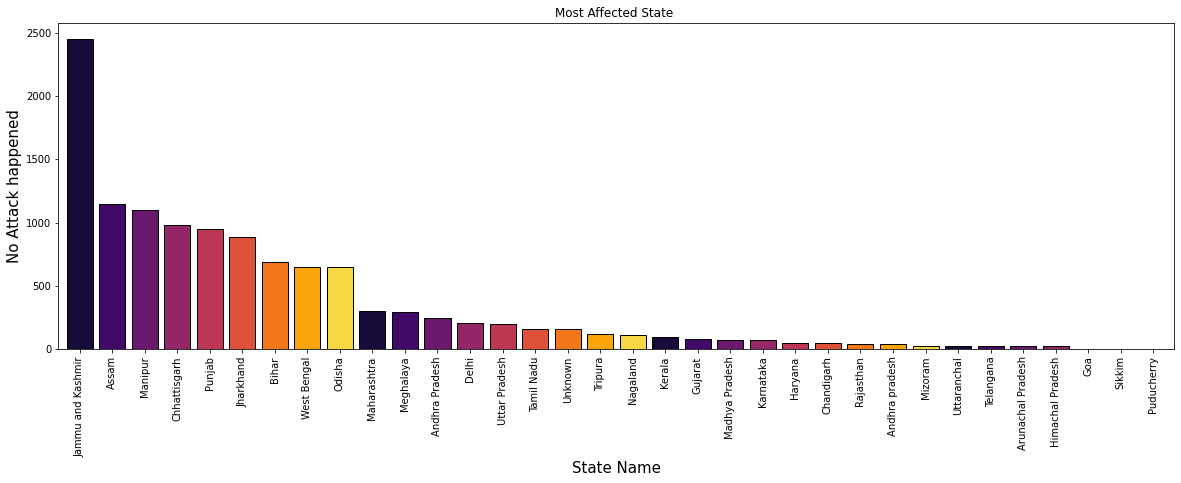

In [40]:
axplt=india_terror_df['provstate'].value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color=sns.color_palette('inferno',9)
)
axplt.set_title("Most Affected State ")
axplt.set_xlabel('State Name', fontsize = 15)
axplt.set_ylabel('No Attack happened', fontsize = 15)

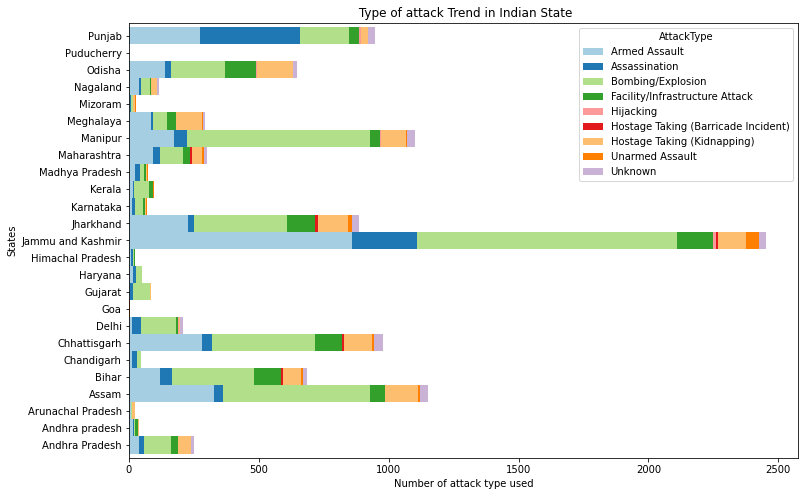

In [41]:
pd.crosstab(india_terror_df.provstate,india_terror_df.AttackType).iloc[0:25].plot.barh(stacked=True,width=1,color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title(" Type of attack Trend in Indian State")
plt.xlabel('Number of attack type used')
plt.ylabel('States')
plt.show()
plt.show()

As we can see that most of the terrorist group in india have bombexplosion their first choice  

Active group during year

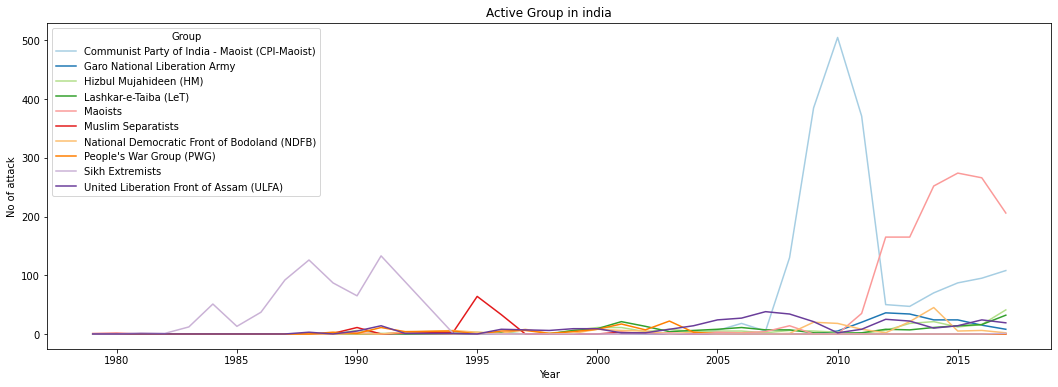

In [42]:
# Active group during year
top_groups10=india_terror_df[india_terror_df['Group'].isin(india_terror_df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Active Group in india")
plt.xlabel('Year')
plt.ylabel('No of attack')
plt.show()
plt.show()

 top attacked state during year

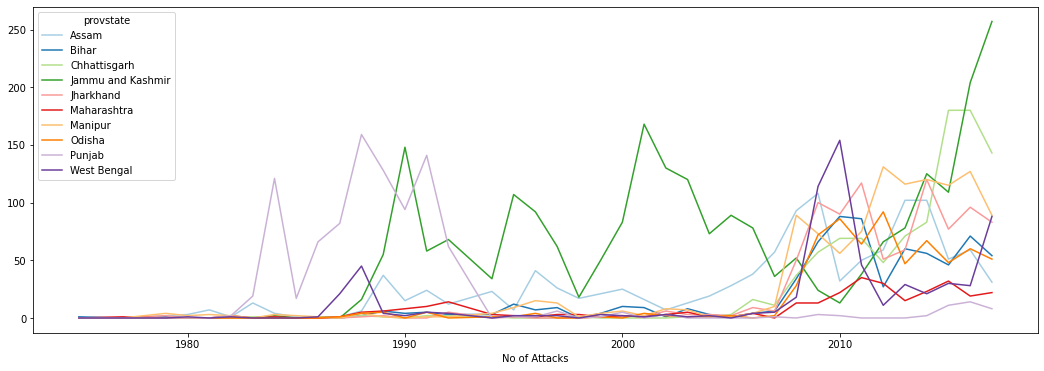

In [43]:
# top attacked state during year
top_groups10=india_terror_df[india_terror_df['provstate'].isin(india_terror_df['provstate'].value_counts()[0:10].index)]
pd.crosstab(top_groups10.Year,top_groups10.provstate).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xlabel("No of Attacks")
plt.show()

Text(0, 0.5, 'No of Attack')

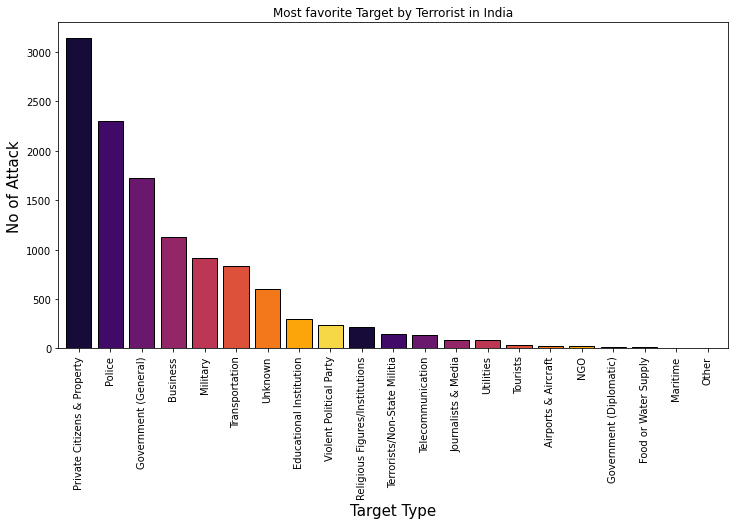

In [44]:
axplt=india_terror_df.Target_type.value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
    color=sns.color_palette('inferno',9)
)
axplt.set_title("Most favorite Target by Terrorist in India")
axplt.set_xlabel('Target Type', fontsize = 15)
axplt.set_ylabel('No of Attack', fontsize = 15)

Text(0, 0.5, 'No of attack')

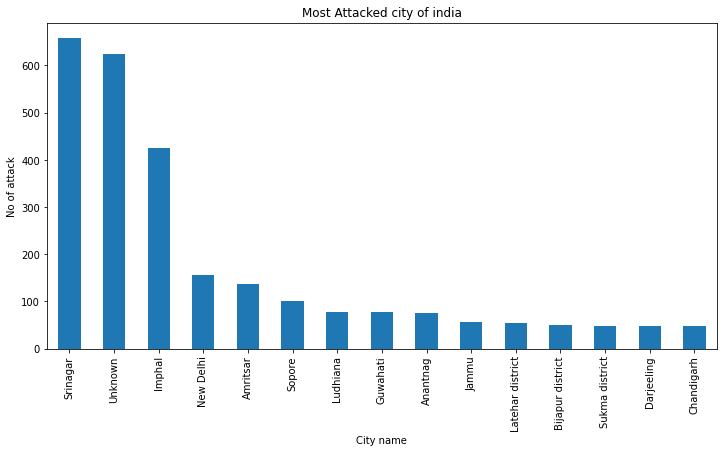

In [45]:
plt_cities=india_terror_df['city'].value_counts().iloc[0:15].plot.bar(figsize = (12,6),
    fontsize = 10)
plt_cities.set_title('Most Attacked city of india')
plt_cities.set_xlabel('City name')
plt_cities.set_ylabel('No of attack')

Text(0.5, 0, 'No Of Casualties')

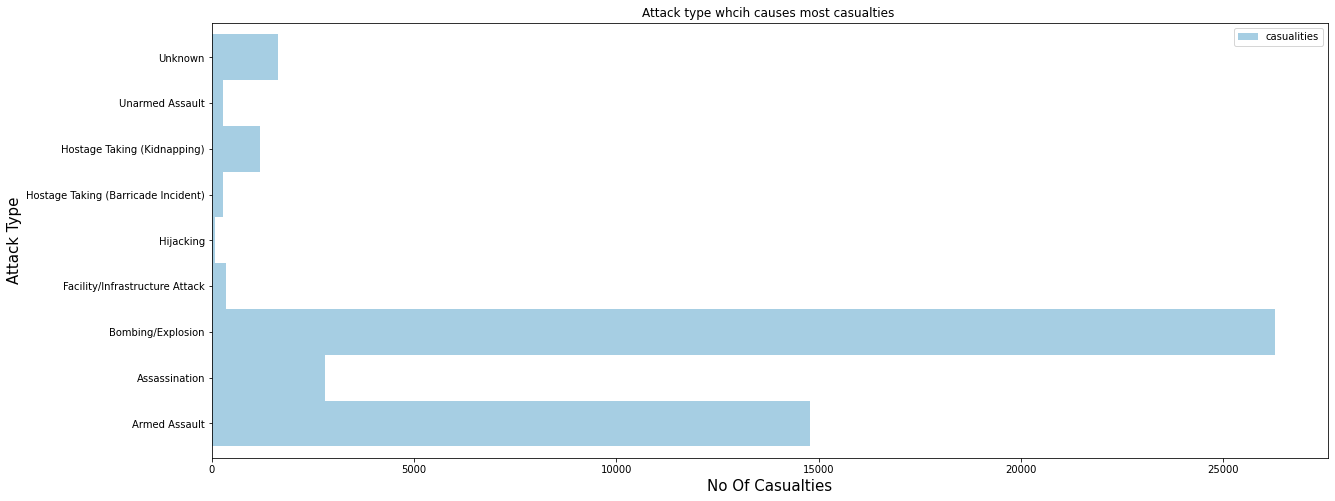

In [46]:
assult=india_terror_df.groupby('AttackType').agg({'casualities':sum}).plot.barh(stacked=True,width=1,color=sns.color_palette('Paired',10))
fig=plt.gcf()
assult.set_title("Attack type whcih causes most casualties ")
assult.set_ylabel('Attack Type', fontsize = 15)
assult.set_xlabel('No Of Casualties', fontsize = 15)

Yeah, we know the answer so the bombing causing more dammage and casualties so thats the cause terrorist groups are chosing bombing .

In [47]:
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0


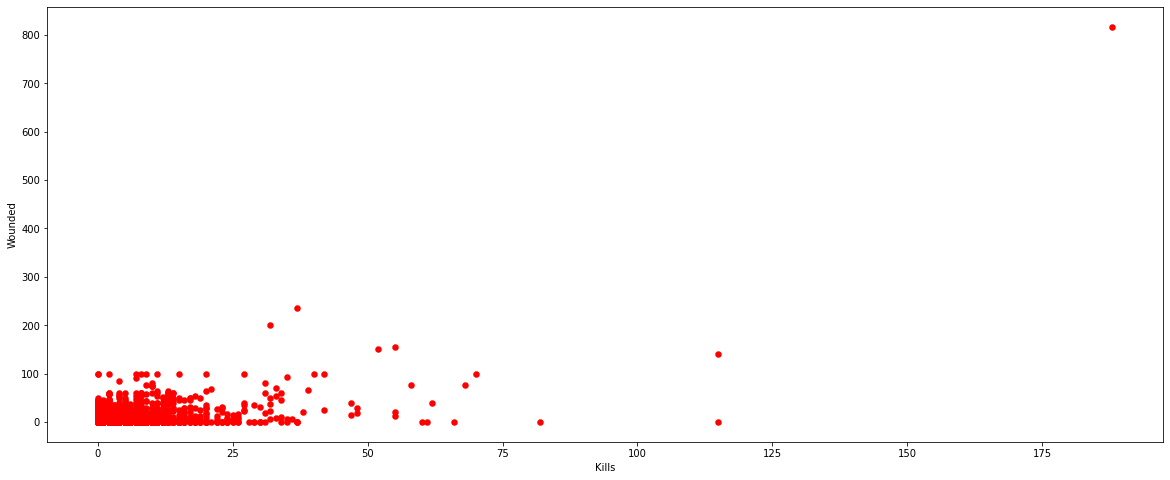

In [48]:
fig=plt.figure()
kills=india_terror_df['Killed'].tolist()
wounded=india_terror_df['Wounded'].tolist()

plt.scatter(kills, wounded,c ="red",linewidths = 2,s =20) 
plt.title("")
plt.xlabel("Kills") 
plt.ylabel("Wounded") 
plt.show()

This Fig shows that every attack happened in india 20 pepole killed or wounded on an avrage 

Text(0, 0.5, 'NUmber of attacks')

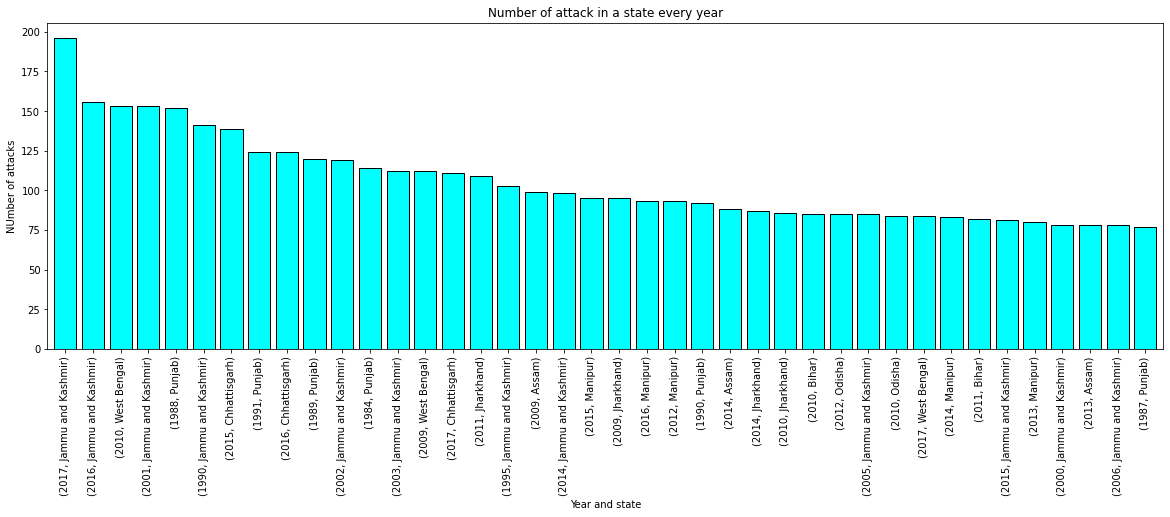

In [49]:
state_ax=india_terror_df.groupby(['Year','provstate'])['success'].sum().sort_values(ascending=False).iloc[0:40].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color= 'aqua'
)
state_ax.set_title('Number of attack in a state every year')
state_ax.set_xlabel("Year and state")
state_ax.set_ylabel("NUmber of attacks")

We can see that Jammu and Kashmir has witnessed the most ugly attacks in india.

In [ ]:
india_terror_df.head()

,eventid,Year,Month,Day,extended,country,Country,region,Region,provstate,city,latitude,longitude,specificity,vicinity,Summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,AttackType,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,casualities
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
2764,197501190004,1975,1,2,0,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,Ananda Marga,1.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",UMD Encyclopedia of World Terrorism 2012,0,0,0,0,4.0
3857,197605260001,1976,5,26,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,0,-9,0.0
5327,197709280004,1977,9,28,0,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,Japanese Red Army (JRA),0.0,0,5.0,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,NaN,NaN,Hijacking DB,1,1,1,1,0.0
7337,197901130004,1979,1,13,0,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,1,1,1,-9.0,0.0,1,0,2,Armed Assault,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,Naga People,0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0,1.0


Text(0, 0.5, 'Number')

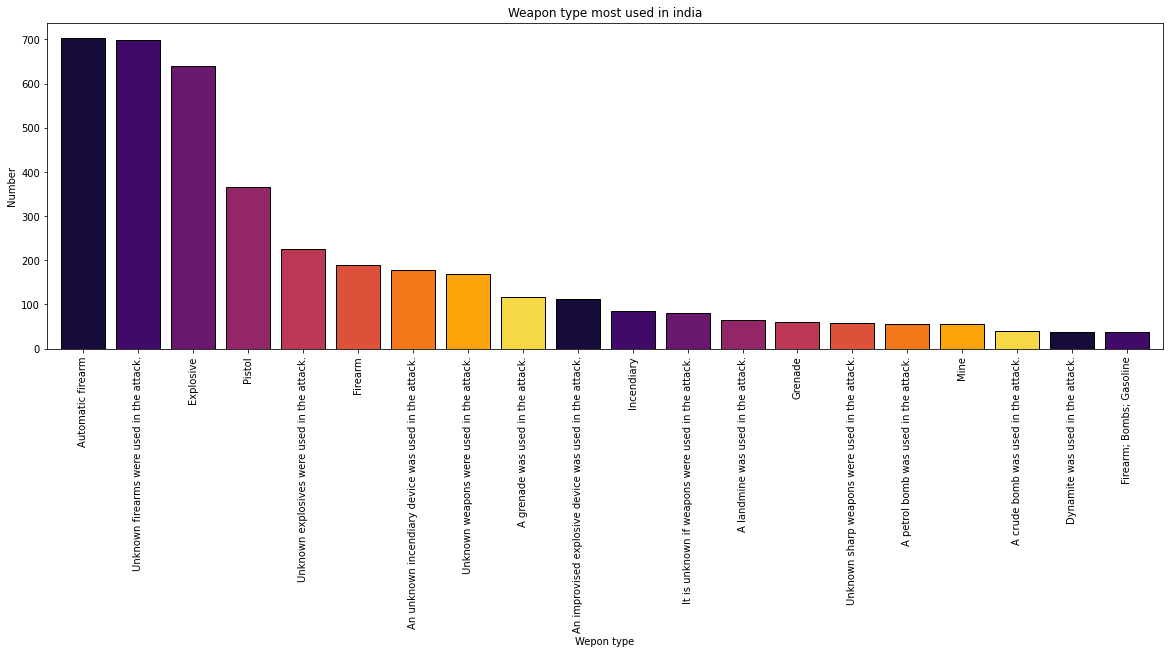

In [ ]:
wep_type=india_terror_df['weapdetail'].value_counts().iloc[0:20].plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (20,6),
    fontsize = 10,
    color=sns.color_palette('inferno',9)
)
wep_type.set_title('Weapon type most used in india')
wep_type.set_xlabel("Wepon type")
wep_type.set_ylabel("Number")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


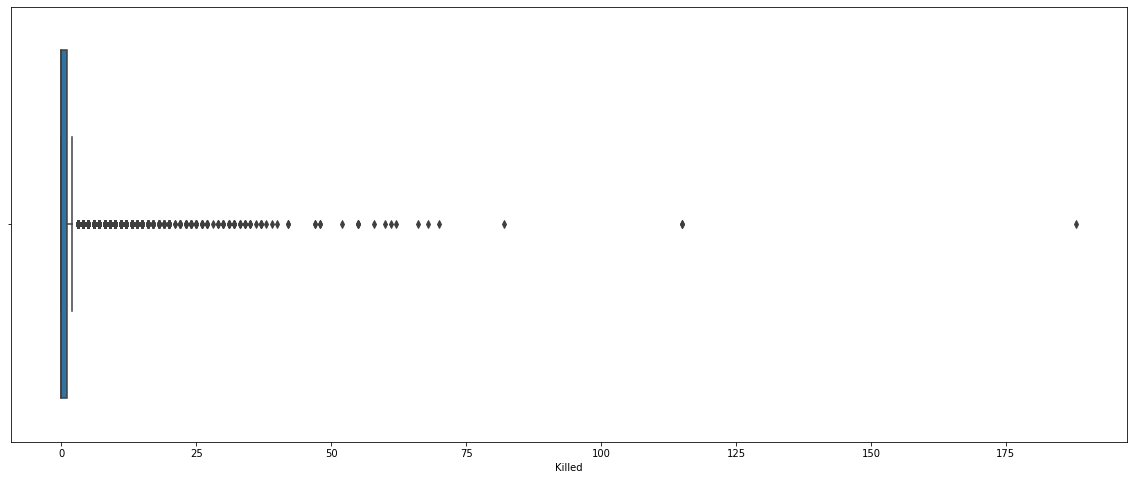

In [59]:
sns.boxplot(india_terror_df['Killed'])

So, we can see that avg citizen killed by for every terror attack between 1 to 3 

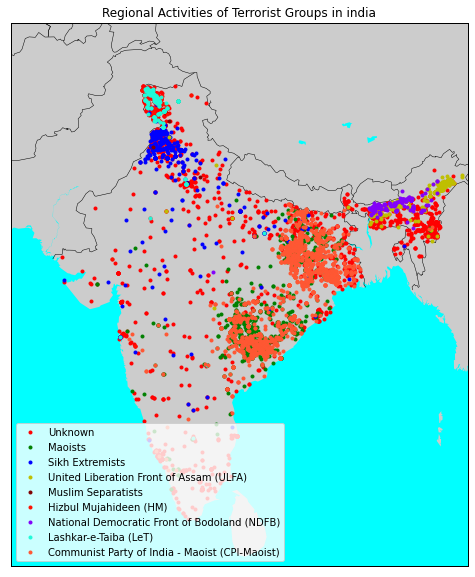

In [ ]:
top_groups=india_terror_df[india_terror_df['Group'].isin(india_terror_df['Group'].value_counts()[:10].index)]
india_map = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
india_map.drawcountries()
india_map.fillcontinents(lake_color='aqua')
india_map.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=india_map(long_group,lat_group)
    india_map.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups in india')
plt.show()

The basemap clearly shows the states of activity by the groups. sikh Extremists is looks to be the notorious group in Punjab . Similarly Maoists is concentrated in Odisha and jharkhand.

The Unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groupst

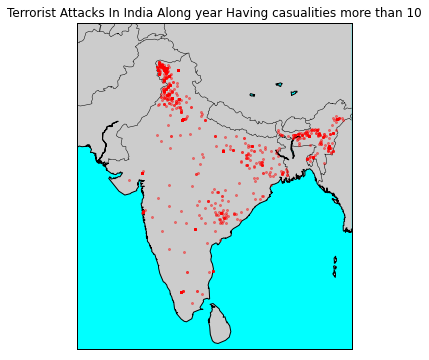

In [ ]:
india_map = Basemap(projection='lcc',resolution='l',llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)


lat_=list(india_terror_df[india_terror_df['casualities']>10].latitude)
long_=list(india_terror_df[india_terror_df['casualities']>10].longitude)
x_,y_=india_map(long_,lat_)
india_map.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)


india_map.drawcoastlines()
india_map.drawcountries()
india_map.fillcontinents(lake_color='aqua')
india_map.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.title('Terrorist Attacks In India Along year Having casualities more than 10')

plt.show()

This fig implies that most india attack are near by border we should make our border more powerful


This Function Information about country and information and graph about that country

In [ ]:
class CountryInfo:
  def __init__(self,country='India',year=1970,month=1):
    self.country=country
    self.year=year
    self.month=month
  
  def Plotgraph(self):
    self.country_df=terror_df[terror_df['Country']==self.country ]
    plt.subplots(figsize=(10,6))
    sns.countplot('Year',data=self.country_df,edgecolor=sns.color_palette('dark',7))
    plt.xticks(rotation=90)
    plt.title(f'Number Of Terrorist Activities Each Year In {self.country}')
    plt.show()

    print("Show Sucees and fail % of every attack")
    count=self.country_df.success.value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.pie(count, labels = ['Success','Fail'],autopct='%1.2f%%')
    plt.show()

    print("This show ")
    axplt=self.country_df['provstate'].value_counts().plot.bar(width=0.8,linewidth=1,
    edgecolor='black',
    figsize = (10,6),
    fontsize = 10,
    color='red')
    axplt.set_title("Most Affected State ")
    axplt.set_xlabel('State Name', fontsize = 15)
    axplt.set_ylabel('No Attack happened', fontsize = 15)
  
    self.country_year_df=self.country_df[self.country_df['Year'] == self.year]

    print('\n')
    print("Show Sucees and fail % of every attack for ",self.year)

    count=self.country_df.success.value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.pie(count, labels = ['Success','Fail'],autopct='%1.2f%%')
    plt.show()
    self.country_year_df.groupby('Month').agg({'success':sum}).plot(kind='bar')

  def ShowInfo(self):
    self.country_df=terror_df[terror_df['Country']==self.country ]
    self.country_year_df=self.country_df[self.country_df['Year'] == self.year]

    self.month_df=self.country_year_df[self.country_year_df['Month'] == self.month]
    for index, row in self.month_df.iterrows():
      if row['success'] ==0:
        continue
      else:
        news_head=row['scite1']
        day=row['Day']
        target=row['Target']
        summary=row['Summary']
        print(f"News HeadLine={news_head} and target was {target} and  {summary}")
        print('\n')

      global_map = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

      lat_=list(filtered_data[filtered_data['Killed']<30].latitude)
      long_=list(filtered_data[filtered_data['Killed']<30].longitude)
      x_,y_=global_map(long_,lat_)
      global_map.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

      lat_=list(filtered_data[filtered_data['Wounded']<30].latitude)
      long_=list(filtered_data[filtered_data['Wounded']<30].longitude)
      x_,y_=global_map(long_,lat_)
      global_map.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

      lat_=list(filtered_data[filtered_data['Wounded']>30].latitude)
      long_=list(filtered_data[filtered_data['Wounded']>30].longitude)
      x_,y_=global_map(long_,lat_)
      global_map.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)
    
      








 



In [ ]:
con=CountryInfo(country='United Kingdom',year=2001,month=7)
# con.Plotgraph()
con.ShowInfo()

News HeadLine=Martin Cowley, "Group Says it Killed Catholic; Banned Protestant Militia Makes Claim in N.Ireland," The San Diego Union-Tribune, July 05, 2001. and target was Ciaran Cummings and  07/04/2001: The Red Hand Defenders (RHD), a Protestant militia, shot a Catholic man named Ciaran Cummings in retaliation for the election of two Sinn Fein members to the council. The two men drove up to him on a motorcycle and the passenger shot him while he was waiting for a ride.


News HeadLine=Alan Erwin, "Pensioners Escape Petrol Bomb Attack," The Press Association Limited, July 16, 2001. and target was Civilians in the Short Strand enclave in Belfast and  07/16/2001: Unknown assailants threw petrol bombs at homes in the Short Strand enclave of east Belfast. The elderly pensioners who lived there were able to escape and no one was injured but some of the homes sustained damage.


News HeadLine=Kitty Holland and Monika Unsworth, "Teenager shot dead outside GAA club in north Belfast," Irish T